In [1]:
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import librosa
import librosa.display
import matplotlib.pyplot as plot
import IPython.display as ipd
import pylab

Using TensorFlow backend.


In [2]:

filename = "../data/tracks/unmastered/pianosolo_unmastered_001.wav"
spectrogramImage = "../data/spectrograms/unmastered/pianosolo_unmastered_001.jpg"
y, sr = librosa.load(filename)

In [3]:
melSpectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
melSpectrogram


array([[4.56335491e-06, 4.37688079e-06, 2.82633082e-06, ...,
        4.88283371e-07, 6.22188415e-07, 4.02264859e-07],
       [6.95482171e-07, 2.56578891e-06, 1.41859269e-05, ...,
        2.76282021e-06, 3.30859618e-06, 4.87820526e-06],
       [7.29308041e-07, 1.86814272e-05, 1.05560317e-04, ...,
        7.54763759e-06, 1.46932419e-05, 1.07079318e-05],
       ...,
       [1.02299138e-09, 1.49326105e-09, 1.29336357e-09, ...,
        9.74003453e-10, 1.08191747e-09, 1.10202963e-09],
       [3.89398782e-10, 4.61464034e-10, 3.69564429e-10, ...,
        3.75400557e-10, 4.24808277e-10, 3.50127424e-10],
       [3.42807506e-11, 4.60646256e-11, 3.93423692e-11, ...,
        2.22742387e-11, 3.36579635e-11, 2.23889797e-11]])

In [4]:
logMel = librosa.amplitude_to_db(melSpectrogram)

In [5]:
plot.figure(figsize=(12, 4))
librosa.display.specshow(logMel, sr=sr, x_axis='time', y_axis ='mel')
plot.title('mel power spectrogram')
plot.colorbar(format='%+2.0f dB')
plot.tight_layout()
pylab.savefig(spectrogramImage, bbox_inches=None, pad_inches=0)
pylab.close()


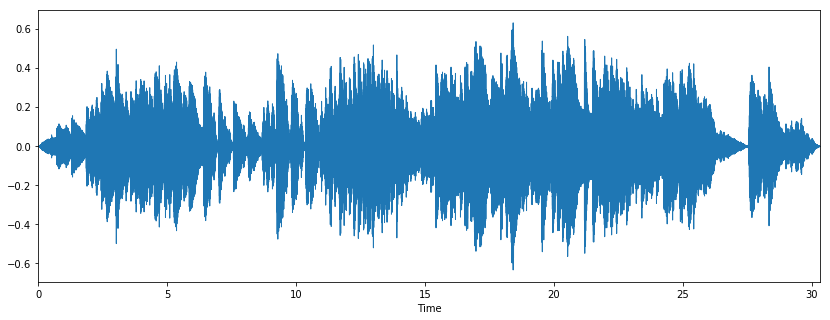

In [6]:
plot.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

In [7]:
ipd.Audio(filename)

In [8]:
#spectrogram without axis and white edges

pylab.axis('off')
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
melSpectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
librosa.display.specshow(logMel, sr=sr)
pylab.savefig(spectrogramImage, bbox_inches=None, pad_inches=0)
pylab.close()


In [9]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc
import imageio

img = imageio.imread(spectrogramImage)

In [10]:
img.shape

(288, 432, 3)

In [11]:
from keras.layers import Conv2D